In [1]:
from google.colab import files
uploaded = files.upload()


Saving apps.csv to apps.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import os
os.listdir()



['.config', 'apps.csv', 'sample_data']

In [6]:


apps_df = pd.read_csv("apps.csv")


In [7]:
apps_df.shape


(9659, 14)

In [8]:
apps_df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
apps_df.info()
apps_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [10]:
apps_df.isnull().sum()


,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


In [11]:
apps_df.dropna(inplace=True)


In [12]:
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)


In [15]:
apps_df['Size'].dtype



dtype('float64')

In [16]:
apps_df['Size'] = apps_df['Size'].astype(str)


In [17]:
apps_df['Size'] = apps_df['Size'].replace('Varies with device', np.nan)


In [18]:
apps_df['Size'] = apps_df['Size'].str.replace('M', '', regex=False)
apps_df['Size'] = apps_df['Size'].str.replace('k', '', regex=False)


In [19]:
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')


In [20]:
apps_df['Size'].head()


,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


In [21]:
apps_df['Size'].dtype


dtype('float64')

In [22]:
apps_df['Installs'] = apps_df['Installs'].astype(str)
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '', regex=False)
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '', regex=False)
apps_df['Installs'] = apps_df['Installs'].astype(int)


In [23]:
apps_df['Installs'].dtype


dtype('int64')

In [24]:
apps_df['Price'] = apps_df['Price'].astype(str)
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False)
apps_df['Price'] = apps_df['Price'].astype(float)


In [25]:
apps_df['Price'].dtype


dtype('float64')

In [26]:
apps_df['Category'].value_counts()


,count
Category,
FAMILY,1511
GAME,832
TOOLS,625
PERSONALIZATION,274
LIFESTYLE,269
MEDICAL,266
FINANCE,258
PRODUCTIVITY,223
BUSINESS,222


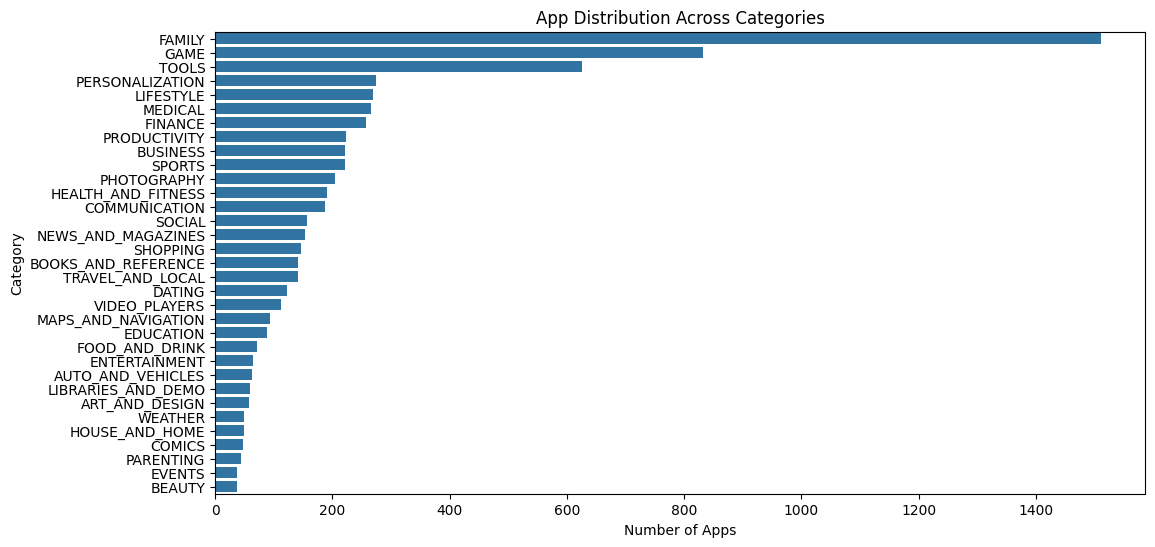

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(
    y='Category',
    data=apps_df,
    order=apps_df['Category'].value_counts().index
)
plt.title("App Distribution Across Categories")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()


In [28]:
apps_df['Rating'].describe()


,Rating
count,7021.000000
mean,4.160704
std,0.559241
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


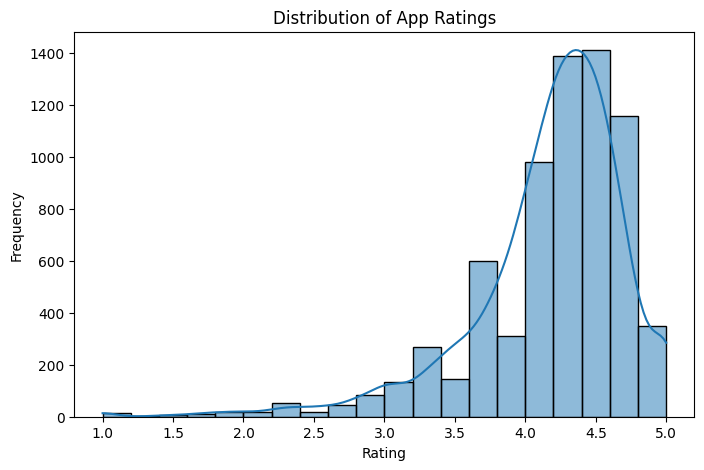

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [30]:
apps_df['Installs'].describe()


,Installs
count,7.021000e+03
mean,4.471804e+06
std,2.714908e+07
min,1.000000e+00
25%,1.000000e+04
50%,1.000000e+05
75%,1.000000e+06
max,1.000000e+09


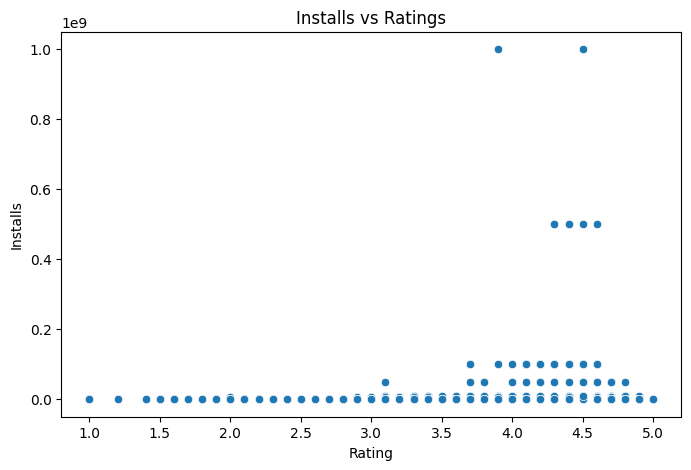

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Installs', data=apps_df)
plt.title("Installs vs Ratings")
plt.show()


In [32]:
apps_df['Size'].describe()


,Size
count,7021.000000
mean,21.767597
std,22.731237
min,0.000000
25%,4.900000
50%,13.000000
75%,31.000000
max,100.000000


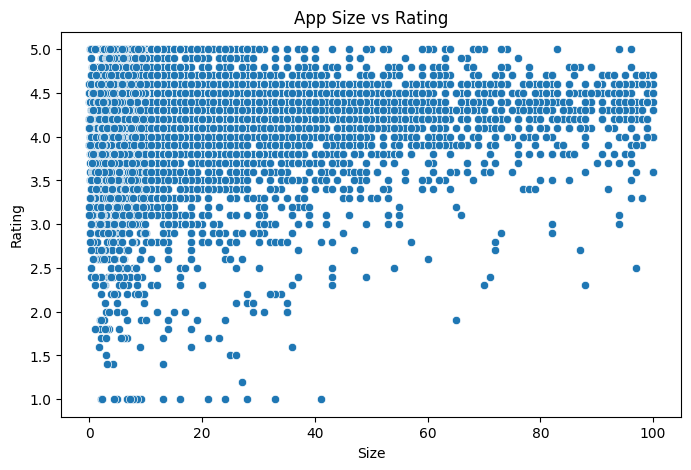

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Rating', data=apps_df)
plt.title("App Size vs Rating")
plt.show()


In [34]:
apps_df['Type'].value_counts()


,count
Type,
Free,6482
Paid,539


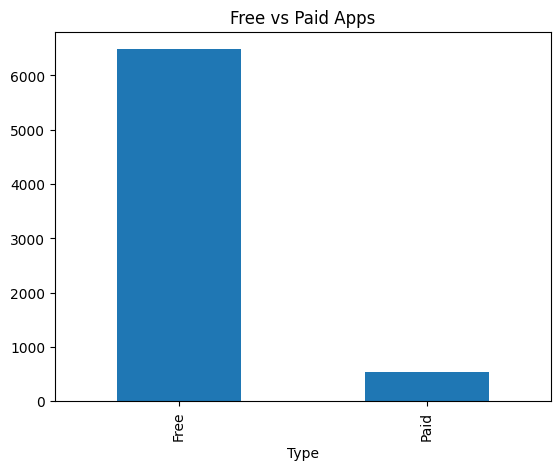

In [35]:
apps_df['Type'].value_counts().plot(kind='bar')
plt.title("Free vs Paid Apps")
plt.show()


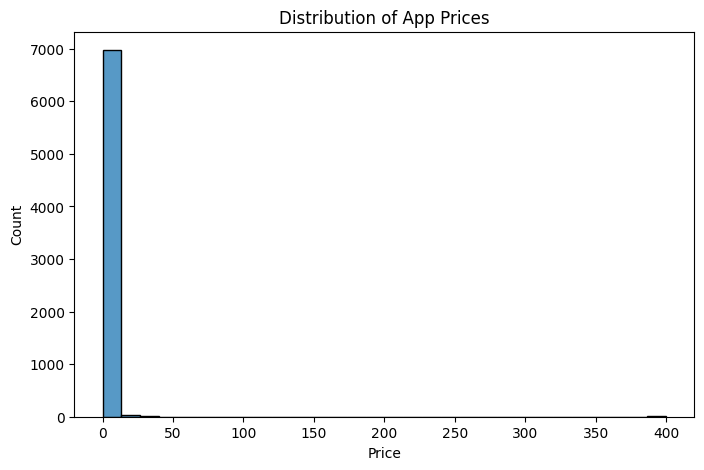

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(apps_df['Price'], bins=30)
plt.title("Distribution of App Prices")
plt.show()


In [37]:
category_rating = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
category_rating.head(10)


,Rating
Category,
EVENTS,4.478947
ART_AND_DESIGN,4.381034
EDUCATION,4.373864
PARENTING,4.347727
PERSONALIZATION,4.324453
BOOKS_AND_REFERENCE,4.322695
BEAUTY,4.291892
SOCIAL,4.257692
WEATHER,4.242000


In [38]:
category_installs = apps_df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
category_installs.head(10)


,Installs
Category,
GAME,1.386100e+07
ENTERTAINMENT,9.968125e+06
COMMUNICATION,9.669763e+06
VIDEO_PLAYERS,7.738055e+06
NEWS_AND_MAGAZINES,7.733120e+06
PHOTOGRAPHY,7.323006e+06
PRODUCTIVITY,5.813014e+06
SHOPPING,4.868024e+06
TOOLS,4.607286e+06


In [39]:
category_price = apps_df.groupby('Category')['Price'].mean().sort_values(ascending=False)
category_price.head(10)


,Price
Category,
FINANCE,9.456860
LIFESTYLE,7.261710
MEDICAL,2.199098
FAMILY,1.468187
WEATHER,0.468800
PERSONALIZATION,0.420876
SPORTS,0.363032
GAME,0.326190
PHOTOGRAPHY,0.325343


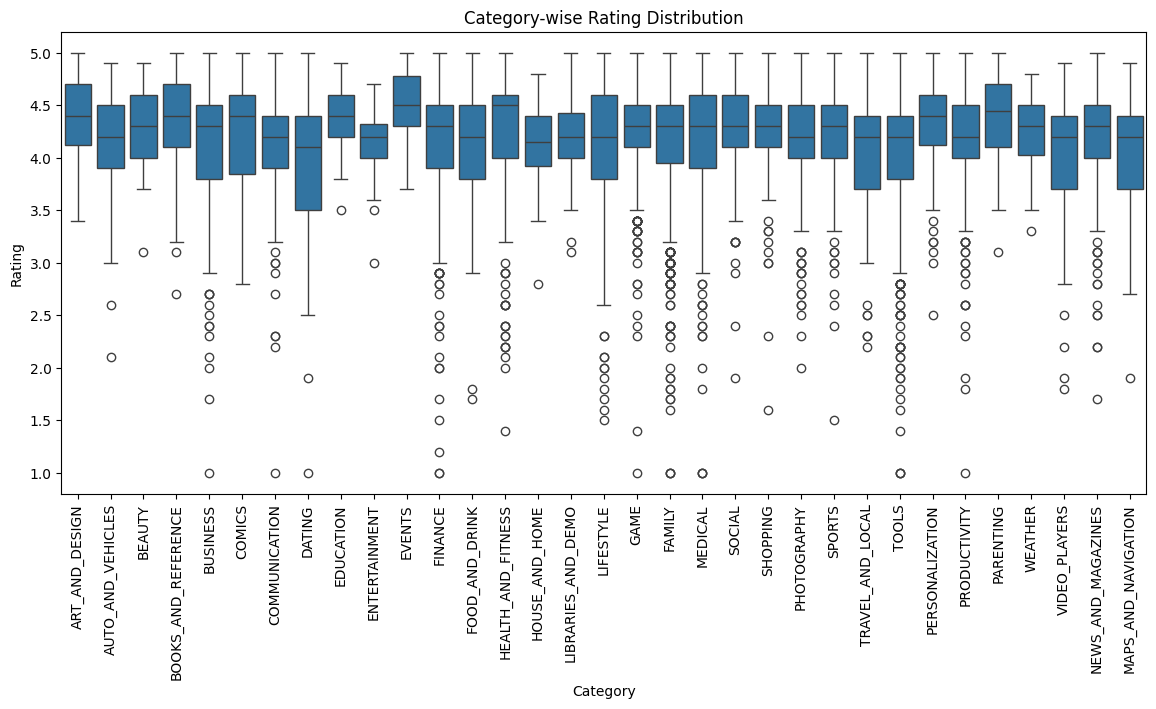

In [40]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Category', y='Rating', data=apps_df)
plt.xticks(rotation=90)
plt.title("Category-wise Rating Distribution")
plt.show()


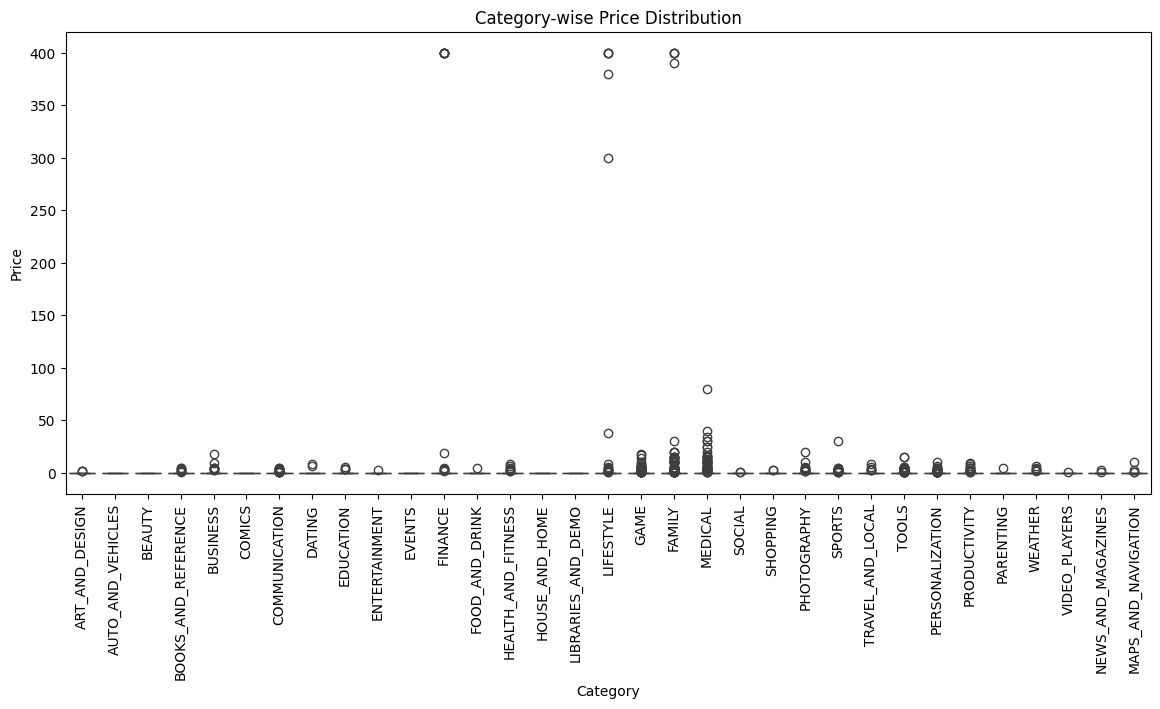

In [41]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Category', y='Price', data=apps_df)
plt.xticks(rotation=90)
plt.title("Category-wise Price Distribution")
plt.show()
